In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

C:\Users\Artem\PycharmProjects\ML\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Artem\PycharmProjects\ML\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - categorical_accuracy: 0.6099 - loss: 1.1121 - val_categorical_accuracy: 0.7655 - val_loss: 0.6058
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - categorical_accuracy: 0.7544 - loss: 0.6555 - val_categorical_accuracy: 0.8297 - val_loss: 0.4607
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - categorical_accuracy: 0.7886 - loss: 0.5646 - val_categorical_accuracy: 0.8247 - val_loss: 0.4559
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - categorical_accuracy: 0.8026 - loss: 0.5301 - val_categorical_accuracy: 0.8452 - val_loss: 0.4144
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 68ms/step - categorical_accuracy: 0.8171 - loss: 0.4964 - val_categorical_accuracy: 0.8597 - val_loss: 0.3754
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - categorical_accuracy: 0.8262 - loss: 0.4747 - val_categorical_accuracy: 0.8592 - val_loss: 0.3921
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - categorical_accuracy

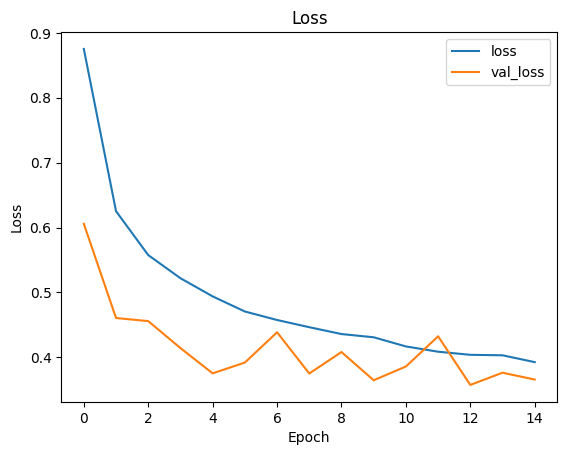

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(10, activation="softmax")
])

    
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = model.fit(
    datagen.flow(train_images.reshape(-1, 28, 28, 1), train_labels, batch_size=64),
    epochs=15,
    validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels),
    callbacks=[early_stopping]
)

test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels, verbose=2)
print(f"Точность на тестовых данных: {test_acc}")

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,455,200 (9.37 MB)

 Trainable params: 818,186 (3.12 MB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 1,636,374 (6.24 MB)

In [ ]:
# Після навчання можна порівняти точність цієї моделі з багатошаровою нейронною мережею, 
# створеною на попередньому етапі. Очікується,
# що використання VGG16, як глибшої мережі, дасть вищу точність завдяки її здатності витягувати складніші ознаки.